# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [45]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.corpus import wordnet as wn

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\loves\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [47]:
# Create a newsapi client
from newsapi import NewsApiClient

In [48]:
newsapi = NewsApiClient(api_key=api_key)

api_key

'435e0fc5b4be4129a25ccc10e4bd9287'

In [49]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q = 'bitcoin',
    language = 'en',
    from_param = '2022-06-01',
    to = '2022-06-02',
    sort_by = 'relevancy',
    page = 2
)

btc_articles

{'status': 'ok',
 'totalResults': 600,
 'articles': [{'source': {'id': None, 'name': 'Erickimphotography.com'},
   'author': 'ERIC KIM',
   'title': 'THE MOST INTERESTING WILL WIN.',
   'description': 'Tesla as the most interesting car, Bitcoin as the most interesting crypto, and for you to win, YOU must become the most interesting person in your own category.',
   'url': 'https://erickimphotography.com/blog/2022/06/01/the-most-interesting-will-win/',
   'urlToImage': 'https://i0.wp.com/erickimphotography.com/blog/wp-content/uploads/2022/06/westerly-v1-5-of-74.jpeg?fit=1200%2C800&ssl=1',
   'publishedAt': '2022-06-01T22:07:46Z',
   'content': 'Tesla as the most interesting car, Bitcoin as the most interesting crypto, and for you to win, YOU must become the most interesting person in your own category.'},
  {'source': {'id': None, 'name': 'Cointelegraph'},
   'author': 'Cointelegraph By Yashu Gola',
   'title': 'Axie Infinity V-shape recovery fizzles as AXS price drops 20% from three-we

In [50]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q = 'ethereum',
    language = 'en',
    from_param = '2022-06-01',
    to = '2022-06-02',
    sort_by = 'relevancy',
    page = 2
)

eth_articles


{'status': 'ok',
 'totalResults': 314,
 'articles': [{'source': {'id': None, 'name': 'Dcforecasts.com'},
   'author': 'Stefan',
   'title': 'Eurovision Winners Raised $1M In Ethereum For Ukraine: Report',
   'description': 'The Eurovision winners Kalush Orchestra raised $1 million in Ethereum for their home country, Ukraine, by auctioning their trophy for 500 ETH to raise funds for the army as we can see more today in our latest Ethereum news. The Eurovision winners Kalush Orche…',
   'url': 'https://www.dcforecasts.com/ethereum-news/eurovision-winners-raised-1m-in-ethereum-for-ukraine-report/',
   'urlToImage': 'https://www.dcforecasts.com/wp-content/uploads/2022/06/ukraien-winners.png',
   'publishedAt': '2022-06-01T14:17:48Z',
   'content': 'The Eurovision winners Kalush Orchestra raised $1 million in Ethereum for their home country, Ukraine, by auctioning their trophy for 500 ETH to raise funds for the army as we can see more today in o… [+3539 chars]'},
  {'source': {'id': None, '

In [51]:
# Create the Bitcoin sentiment scores DataFrame
btc_df= pd.DataFrame(btc_articles["articles"])
eth_df = pd.DataFrame(eth_articles["articles"])

In [52]:
btc_df.to_pickle('btcnews.pickle')
eth_df.to_pickle('ethnews.pkl')

In [53]:
# Create the Ethereum sentiment scores DataFrame
"""
sentiments = []

for articles in eth_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()
"""

'\nsentiments = []\n\nfor articles in eth_articles["articles"]:\n    try:\n        text = articles["content"]\n        results = analyzer.polarity_scores(text)\n        compound = results["compound"]\n        pos = results["pos"]\n        neu = results["neu"]\n        neg = results["neg"]\n\n        sentiments.append({\n            "text": text,\n            "Compound": compound,\n            "Positive": pos,\n            "Negative": neg,\n            "Neutral": neu,\n        })\n    except AttributeError:\n        pass\n    \neth  = pd.DataFrame(sentiments)\neth.head()\n'

In [54]:
btc_df['btc_title_compound'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['compound'])
btc_df['btc_title_pos'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['pos'])
btc_df['btc_title_neg'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['neg'])
btc_df['btc_title_neu'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['neu'])



eth_df['eth_title_compound'] = eth_df['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
eth_df['btc_title_pos'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['pos'])
eth_df['btc_title_neg'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['neg'])
eth_df['btc_title_neu'] = btc_df['title'].apply(lambda x : analyzer.polarity_scores(x)['neu'])

btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,btc_title_compound,btc_title_pos,btc_title_neg,btc_title_neu
0,"{'id': None, 'name': 'Erickimphotography.com'}",ERIC KIM,THE MOST INTERESTING WILL WIN.,"Tesla as the most interesting car, Bitcoin as ...",https://erickimphotography.com/blog/2022/06/01...,https://i0.wp.com/erickimphotography.com/blog/...,2022-06-01T22:07:46Z,"Tesla as the most interesting car, Bitcoin as ...",0.7939,0.702,0.000,0.298
1,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Yashu Gola,Axie Infinity V-shape recovery fizzles as AXS ...,"Strong correlation with Bitcoin, and, in turn,...",https://cointelegraph.com/news/axie-infinity-v...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T08:56:33Z,Axie Infinity (AXS) price dropped sharply on J...,0.0000,0.000,0.000,1.000
2,"{'id': None, 'name': 'Yahoo Entertainment'}","Damanick Dantes, James Rubin",First Mover Asia: Bitcoin Sinks Below $30K Ami...,Major altcoins fared worse in Wednesday tradin...,https://finance.yahoo.com/news/first-mover-asi...,https://s.yimg.com/uu/api/res/1.2/eF4gD7HwD8b3...,2022-06-02T00:01:09Z,"Don't miss CoinDesk's Consensus 2022, the must...",-0.5994,0.000,0.353,0.647
3,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Jesse Coghlan,"The more you know about Bitcoin, the more opti...",In its 2022 Bitcoin Knowledge and Perceptions ...,https://cointelegraph.com/news/the-more-you-kn...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T04:02:34Z,A survey from digital payment company Block In...,-0.0790,0.157,0.176,0.667
4,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By William Suberg,Bitcoin price risks $29K 'nosedive' as Wall St...,Weakness across markets means fresh bad news f...,https://cointelegraph.com/news/bitcoin-price-r...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T16:57:48Z,Bitcoin (BTC) lost bullish momentum at the Jun...,-0.3612,0.143,0.298,0.559


In [55]:
"""
sentiments = []
for articles in btc_articles["articles"]:
        try:
                text = articles["content"]
                date = articles["publishedAt"][:10]
                sentiment = analyzer.polarity_scores(text)
                compound = sentiment["compound"]
                pos = sentiment["pos"]
                neu = sentiment["neu"]
                neg = sentiment["neg"]
                sentiments.append({
                        "text": text,
                        "date": date,
                        "compound": compound,
                        "positive": pos,
                        "negative": neg,
                        "neutral": neu
            
        })
        
        except AttributeError:
          pass


btc  = pd.DataFrame(sentiments)
btc.head()
"""

'\nsentiments = []\nfor articles in btc_articles["articles"]:\n        try:\n                text = articles["content"]\n                date = articles["publishedAt"][:10]\n                sentiment = analyzer.polarity_scores(text)\n                compound = sentiment["compound"]\n                pos = sentiment["pos"]\n                neu = sentiment["neu"]\n                neg = sentiment["neg"]\n                sentiments.append({\n                        "text": text,\n                        "date": date,\n                        "compound": compound,\n                        "positive": pos,\n                        "negative": neg,\n                        "neutral": neu\n            \n        })\n        \n        except AttributeError:\n          pass\n\n\nbtc  = pd.DataFrame(sentiments)\nbtc.head()\n'

In [56]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,btc_title_compound,btc_title_pos,btc_title_neg,btc_title_neu
count,100.000000,100.000000,100.000000,100.000000
mean,0.019373,0.069610,0.060760,0.869630
std,0.321528,0.124497,0.119132,0.150222
min,-0.790600,0.000000,0.000000,0.298000
25%,0.000000,0.000000,0.000000,0.775750
50%,0.000000,0.000000,0.000000,0.902000
75%,0.177900,0.157000,0.000000,1.000000
max,0.793900,0.702000,0.571000,1.000000


In [57]:
"""
sentiments = []
for articles in eth_articles["articles"]:
        try:
                text = articles["content"]
                date = articles["publishedAt"][:10]
                sentiment = analyzer.polarity_scores(text)
                compound = sentiment["compound"]
                pos = sentiment["pos"]
                neu = sentiment["neu"]
                neg = sentiment["neg"]
                sentiments.append({
                        "text": text,
                        "date": date,
                        "compound": compound,
                        "positive": pos,
                        "negative": neg,
                        "neutral": neu
            
        })
        
        except AttributeError:
          pass


eth = pd.DataFrame(sentiments)
eth.head()
"""

'\nsentiments = []\nfor articles in eth_articles["articles"]:\n        try:\n                text = articles["content"]\n                date = articles["publishedAt"][:10]\n                sentiment = analyzer.polarity_scores(text)\n                compound = sentiment["compound"]\n                pos = sentiment["pos"]\n                neu = sentiment["neu"]\n                neg = sentiment["neg"]\n                sentiments.append({\n                        "text": text,\n                        "date": date,\n                        "compound": compound,\n                        "positive": pos,\n                        "negative": neg,\n                        "neutral": neu\n            \n        })\n        \n        except AttributeError:\n          pass\n\n\neth = pd.DataFrame(sentiments)\neth.head()\n'

In [58]:
# Describe the Ethereum Sentiment
eth_df.describe()

,eth_title_compound,btc_title_pos,btc_title_neg,btc_title_neu
count,100.000000,100.000000,100.000000,100.000000
mean,0.104355,0.069610,0.060760,0.869630
std,0.306499,0.124497,0.119132,0.150222
min,-0.743000,0.000000,0.000000,0.298000
25%,0.000000,0.000000,0.000000,0.775750
50%,0.000000,0.000000,0.000000,0.902000
75%,0.345300,0.157000,0.000000,1.000000
max,0.750600,0.702000,0.571000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC had the highest positive mean score of 11% and ETH had 9%.

Q: Which coin had the highest compound score?

A: BTC had the hightest compound score of 0.9 and ETH had 0.8.

Q. Which coin had the highest positive score?

A: BTC had the highest positive score of 34.9 and ETC had 22.7.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [60]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop=stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [61]:
#Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    lemmatizer = WordNetLemmatizer()
    stop=stopwords.words('english')
    # Remove the punctuation from text
    import re 
    regex= re.compile('[^a-zA-Z0-9 ]')   

    # Create a tokenized list of the words
    words = regex.sub('', text)
    words = word_tokenize(words)

    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [lemmatizer.lemmatize(word).lower() for word in words if word not in stop]
    

    
    
    return tokens


In [62]:
btc_tokenized = []
words = []
for i in range(btc_df.shape[0]):
    text=btc_df.iloc[i]['title']
    words += tokenizer(text)
words

['the',
 'most',
 'interesting',
 'will',
 'win',
 'axie',
 'infinity',
 'vshape',
 'recovery',
 'fizzle',
 'axs',
 'price',
 'drop',
 '20',
 'threeweek',
 'high',
 'first',
 'mover',
 'asia',
 'bitcoin',
 'sinks',
 'below',
 '30k',
 'amid',
 'renewed',
 'risk',
 'fears',
 'the',
 'know',
 'bitcoin',
 'optimistic',
 'block',
 'survey',
 'bitcoin',
 'price',
 'risk',
 '29k',
 'nosedive',
 'wall',
 'street',
 'open',
 'fresh',
 'loss',
 'bitcoin',
 'volatility',
 'set',
 'get',
 'weird',
 'price',
 'dip',
 '30k',
 'this',
 'classic',
 'bitcoin',
 'metric',
 'flashing',
 'buy',
 'first',
 'time',
 'since',
 'march',
 '2020',
 'bitcoin',
 'may',
 'hit',
 '14k',
 '2022',
 'buying',
 'btc',
 'good',
 'get',
 'analyst',
 'bitcoin',
 'daily',
 'mining',
 'revenue',
 'slumped',
 'may',
 'elevenmonth',
 'low',
 'how',
 'make',
 'money',
 'with',
 'stablecoins',
 'dmg',
 'blockchain',
 'solutions',
 'posts',
 'q2',
 'revenue',
 '119m',
 '377',
 'year',
 'over',
 'year',
 'announces',
 'quarterly'

In [63]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.title.apply(tokenizer)
btc_df.head()


,source,author,title,description,url,urlToImage,publishedAt,content,btc_title_compound,btc_title_pos,btc_title_neg,btc_title_neu,tokens
0,"{'id': None, 'name': 'Erickimphotography.com'}",ERIC KIM,THE MOST INTERESTING WILL WIN.,"Tesla as the most interesting car, Bitcoin as ...",https://erickimphotography.com/blog/2022/06/01...,https://i0.wp.com/erickimphotography.com/blog/...,2022-06-01T22:07:46Z,"Tesla as the most interesting car, Bitcoin as ...",0.7939,0.702,0.000,0.298,"[the, most, interesting, will, win]"
1,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Yashu Gola,Axie Infinity V-shape recovery fizzles as AXS ...,"Strong correlation with Bitcoin, and, in turn,...",https://cointelegraph.com/news/axie-infinity-v...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T08:56:33Z,Axie Infinity (AXS) price dropped sharply on J...,0.0000,0.000,0.000,1.000,"[axie, infinity, vshape, recovery, fizzle, axs..."
2,"{'id': None, 'name': 'Yahoo Entertainment'}","Damanick Dantes, James Rubin",First Mover Asia: Bitcoin Sinks Below $30K Ami...,Major altcoins fared worse in Wednesday tradin...,https://finance.yahoo.com/news/first-mover-asi...,https://s.yimg.com/uu/api/res/1.2/eF4gD7HwD8b3...,2022-06-02T00:01:09Z,"Don't miss CoinDesk's Consensus 2022, the must...",-0.5994,0.000,0.353,0.647,"[first, mover, asia, bitcoin, sinks, below, 30..."
3,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Jesse Coghlan,"The more you know about Bitcoin, the more opti...",In its 2022 Bitcoin Knowledge and Perceptions ...,https://cointelegraph.com/news/the-more-you-kn...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T04:02:34Z,A survey from digital payment company Block In...,-0.0790,0.157,0.176,0.667,"[the, know, bitcoin, optimistic, block, survey]"
4,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By William Suberg,Bitcoin price risks $29K 'nosedive' as Wall St...,Weakness across markets means fresh bad news f...,https://cointelegraph.com/news/bitcoin-price-r...,https://images.cointelegraph.com/images/1200_a...,2022-06-01T16:57:48Z,Bitcoin (BTC) lost bullish momentum at the Jun...,-0.3612,0.143,0.298,0.559,"[bitcoin, price, risk, 29k, nosedive, wall, st..."


In [64]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.title.apply(tokenizer)
eth_df.head()


,source,author,title,description,url,urlToImage,publishedAt,content,eth_title_compound,btc_title_pos,btc_title_neg,btc_title_neu,tokens
0,"{'id': None, 'name': 'Dcforecasts.com'}",Stefan,Eurovision Winners Raised $1M In Ethereum For ...,The Eurovision winners Kalush Orchestra raised...,https://www.dcforecasts.com/ethereum-news/euro...,https://www.dcforecasts.com/wp-content/uploads...,2022-06-01T14:17:48Z,The Eurovision winners Kalush Orchestra raised...,0.4767,0.702,0.000,0.298,"[eurovision, winners, raised, 1m, in, ethereum..."
1,"{'id': None, 'name': 'Ambcrypto.com'}",Kanav Jain,Ethereum’s [ETH] under-performance on the char...,Massive ETH holdings have been moved into exch...,https://ambcrypto.com/ethereums-eth-under-perf...,https://files.ambcrypto.com/wp-content/uploads...,2022-06-02T13:30:25Z,Massive ETH holdings have been moved into exch...,0.4404,0.000,0.000,1.000,"[ethereums, eth, underperformance, chart, cont..."
2,"{'id': None, 'name': 'Ambcrypto.com'}",Jacob Thomas,Ooki 2.0 is live on Ethereum with the latest f...,Ooki is bringing Ooki version 2.0 to Ethereum ...,https://ambcrypto.com/ooki-2-0-is-live-on-ethe...,https://files.ambcrypto.com/wp-content/uploads...,2022-06-02T05:45:53Z,Ooki is bringing Ooki version 2.0 to Ethereum ...,0.0000,0.000,0.353,0.647,"[ooki, 20, live, ethereum, latest, feature, pr..."
3,"{'id': None, 'name': 'Dcforecasts.com'}",Stefan,Ethereum’s Topside Bias Remains Vulnerable Aft...,Ethereum’s topside bias remains vulnerable aft...,https://www.dcforecasts.com/ethereum-news/ethe...,https://www.dcforecasts.com/wp-content/uploads...,2022-06-02T12:41:29Z,Ethereums topside bias remains vulnerable afte...,-0.5267,0.157,0.176,0.667,"[ethereums, topside, bias, remains, vulnerable..."
4,"{'id': None, 'name': 'Bitcoin Magazine'}",Bitcoin Magazine,Hard Lessons Learned From Experimenting With A...,Bitcoiners on Twitter Spaces share ways they’v...,https://bitcoinmagazine.com/markets/hard-lesso...,https://bitcoinmagazine.com/.image/t_share/MTg...,2022-06-01T01:30:00Z,This is a recording of a recent Twitter Spaces...,-0.1027,0.143,0.298,0.559,"[hard, lessons, learned, from, experimenting, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams

In [66]:
# Generate the Bitcoin N-grams where N=2

btc_tokens = []
for token in btc_df['tokens']:
    btc_tokens = btc_tokens + token
    
btc_tokens[0]

btc_bigrams = ngrams(btc_tokens, n=2)
Counter(btc_bigrams).most_common(10)

[(('bitcoin', 'price'), 4),
 (('bear', 'market'), 4),
 (('crypto', 'exchange'), 4),
 (('first', 'mover'), 3),
 (('cftc', 'sue'), 3),
 (('sue', 'crypto'), 3),
 (('mover', 'asia'), 2),
 (('asia', 'bitcoin'), 2),
 (('below', '30k'), 2),
 (('bitcoin', 'may'), 2)]

In [67]:
# Generate the Ethereum N-grams where N=2
eth_tokens = []
for token in eth_df['tokens']:
    eth_tokens = eth_tokens + token
    
eth_tokens[0]

eth_bigrams = ngrams(eth_tokens, n=2)
Counter(eth_bigrams).most_common(10)

[(('live', 'ethereum'), 3),
 (('bitcoin', 'btc'), 3),
 (('insider', 'trading'), 3),
 (('optimism', 'token'), 3),
 (('ooki', '20'), 2),
 (('20', 'live'), 2),
 (('latest', 'feature'), 2),
 (('feature', 'previously'), 2),
 (('l2', 'deployment'), 2),
 (('terras', 'luna'), 2)]

In [68]:
# Function token_count generates the top 10 words for a given coin
#def token_count(tokens, N=3):
#    """Returns the top N tokens from the frequency count"""
#    return Counter(tokens).most_common(N)


def word_counter(token_list): 
    top_10_words = dict(Counter(token_list).most_common(10))
    return pd.DataFrame(list(top_10_words.items()), columns=['words', 'times count'])

In [69]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(btc_tokens)

,words,times count
0,bitcoin,39
1,crypto,28
2,blockchain,10
3,price,9
4,2022,8
5,may,7
6,the,6
7,first,6
8,btc,6
9,how,6


In [70]:
# Use token_count to get the top 10 words for Ethereum
word_counter(eth_tokens)

,words,times count
0,ethereum,21
1,crypto,19
2,bitcoin,15
3,to,11
4,optimism,11
5,the,11
6,token,10
7,blockchain,8
8,in,6
9,after,6


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

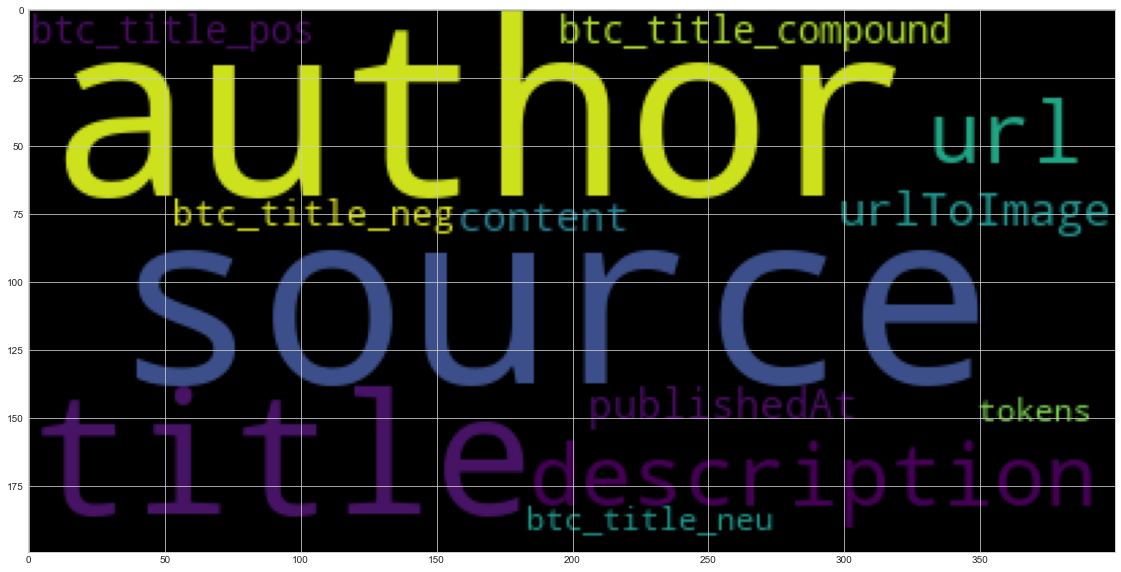

In [72]:
# Generate the Bitcoin word cloud
btc_word_cloud = " ".join([str(word) for word in btc_df])
wc_btc = WordCloud().generate(btc_word_cloud)
plt.imshow(wc_btc)

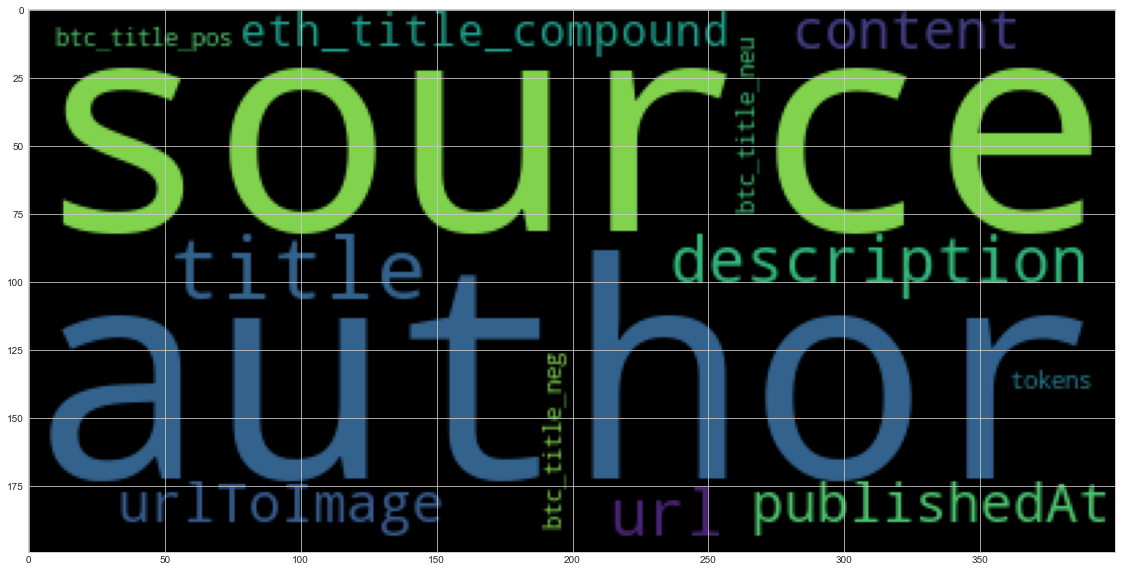

In [73]:
# Generate the Ethereum word cloud
eth_word_cloud = " ".join([str(word) for word in eth_df])
wc_btc = WordCloud().generate(eth_word_cloud)
plt.imshow(wc_btc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [75]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [77]:
# Concatenate all of the Bitcoin text together
btc_text_tgthr = []
for text in btc_df.title:
    btc_text_tgthr.append(text)

btc_paragraphs = ''.join([str(word) for word in btc_text_tgthr])

In [78]:
# Run the NER processor on all of the text
btc = nlp(btc_paragraphs)

# Add a title to the document
btc.user_data["title"] = "Bitcoin NER"

In [79]:
# Render the visualization
displacy.render(btc, style='ent')


In [80]:
# List all Entities
for ent in btc.ents:
    print(ent)

AXS
20%
three-week
30
$29K '
30kThis
first
March 2020Bitcoin
2022
May
eleven-month
$11.9M
377%
Announces Quarterly Financial Results
June 3
2022Bear
SurvivalSOLTEIR COMPLETES SERIES A ROUND TO EXPAND
OFFERINGFirst Mover Americas
Bitcoin Bounces Back
Hurricane
New CFOFirst Mover
Asia
Bearish Sentiment RemainsChipotle Lovers Can Now Buy Burritos
ReportSolana
$500 Million Fund
Crypto MarketTalking
Tezos
Arthur
Blockchain
Changing
Gemini
$25K marks
Purpose Bitcoin ETF
May 2022Report
1.7
MillionIs Green Bitcoin Mining Possible?$32K Bitcoin
Friday
$160M
5.2%
30,121.82Bitcoin
6.9%
30,000Fed
crypto?Bitcoin
NH
senate
La Carte
June
3
supportKraken
2.0
the BlockchainWinklevoss Twins’ Gemini Gets Sued For Allegedly Lying
Federal RegulatorsCoinDesk
Robin SchmidtConsensus 2022
June
12
May 2022 Month-End
May
sequentiallyUS CFTC
Gemini
2017
Singapore
$500 million
Launches New Partnership With Hedge
USCommodity
Winklevoss
statements’Crypto Markets Wrap
African
Hip-Hop Legend Cassper Nyovest
BitcasinoVe

---

### Ethereum NER

In [81]:
# Concatenate all of the Ethereum text together
eth_text_tgthr = []
for text in eth_df.title:
    eth_text_tgthr.append(text)

eth_paragraphs = ''.join([str(word) for word in eth_text_tgthr])

In [82]:
# Run the NER processor on all of the text
eth = nlp(btc_paragraphs)

# Add a title to the document
eth.user_data["title"] = "Ethereum NER"


In [83]:
# Render the visualization
displacy.render(eth, style='ent')


In [84]:
# List all Entities
for ent in eth.ents:
    print(ent)

AXS
20%
three-week
30
$29K '
30kThis
first
March 2020Bitcoin
2022
May
eleven-month
$11.9M
377%
Announces Quarterly Financial Results
June 3
2022Bear
SurvivalSOLTEIR COMPLETES SERIES A ROUND TO EXPAND
OFFERINGFirst Mover Americas
Bitcoin Bounces Back
Hurricane
New CFOFirst Mover
Asia
Bearish Sentiment RemainsChipotle Lovers Can Now Buy Burritos
ReportSolana
$500 Million Fund
Crypto MarketTalking
Tezos
Arthur
Blockchain
Changing
Gemini
$25K marks
Purpose Bitcoin ETF
May 2022Report
1.7
MillionIs Green Bitcoin Mining Possible?$32K Bitcoin
Friday
$160M
5.2%
30,121.82Bitcoin
6.9%
30,000Fed
crypto?Bitcoin
NH
senate
La Carte
June
3
supportKraken
2.0
the BlockchainWinklevoss Twins’ Gemini Gets Sued For Allegedly Lying
Federal RegulatorsCoinDesk
Robin SchmidtConsensus 2022
June
12
May 2022 Month-End
May
sequentiallyUS CFTC
Gemini
2017
Singapore
$500 million
Launches New Partnership With Hedge
USCommodity
Winklevoss
statements’Crypto Markets Wrap
African
Hip-Hop Legend Cassper Nyovest
BitcasinoVe

---